**Problem Statement**

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

### Step 1: Importing and Merging Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd, numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing all datasets
lead_data = pd.read_csv("Leads.csv",usecols = ["Lead Number","Lead Source","Do Not Email","Do Not Call",
"Converted",
"TotalVisits",
"Total Time Spent on Website",
"Specialization",
"How did you hear about X Education",                                                     
"What is your current occupation",
"What matters most to you in choosing a course",                                                          
"Search",
"Magazine",
"Newspaper Article",
"X Education Forums",
"Newspaper",
"Digital Advertisement",
"Through Recommendations",
"Tags",
"Lead Quality",
"Lead Profile",
"I agree to pay the amount through cheque",
"Last Notable Activity"                                               
])
lead_data.head()

,Lead Number,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,I agree to pay the amount through cheque,Last Notable Activity
0,660737,Olark Chat,No,No,0,0.0,0,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,No,Modified
1,660728,Organic Search,No,No,0,5.0,674,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Ringing,NaN,Select,No,Email Opened
2,660727,Direct Traffic,No,No,1,2.0,1532,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,No,Email Opened
3,660719,Direct Traffic,No,No,0,1.0,305,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Ringing,Not Sure,Select,No,Modified
4,660681,Google,No,No,1,2.0,1428,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Will revert after reading the email,Might be,Select,No,Modified


### Step 2: Inspecting the Dataframe

In [3]:
# Let's check the dimensions of the dataframe
lead_data.shape

(9240, 23)

In [4]:
# let's look at the statistical aspects of the dataframe
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website
count,9240.000000,9240.000000,9103.000000,9240.000000
mean,617188.435606,0.385390,3.445238,487.698268
std,23405.995698,0.486714,4.854853,548.021466
min,579533.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000
50%,615479.000000,0.000000,3.000000,248.000000
75%,637387.250000,1.000000,5.000000,936.000000
max,660737.000000,1.000000,251.000000,2272.000000


In [5]:
# Let's see the type of each column
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Specialization                                 7802 non-null   object 
 8   How did you hear about X Education             7033 non-null   object 
 9   What is your current occupation                6550 

### Step 3: Finding Missing Values

In [6]:
# Checking the count of Null values in each column
lead_data.isnull().sum()

Lead Number                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations                             0
Tags                        

In [7]:
# Checking the % of Null values in each column
lead_data.isnull().mean().round(8) * 100

Lead Number                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.000000
Digital Advertisement                             0.0000

In [8]:
# Dropping column "Tags", "Lead Quality" from Dataframe
lead_data = lead_data.drop(['Tags','Lead Quality'], axis=1)

In [9]:
lead_data["Specialization"].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [10]:
lead_data.Specialization = lead_data.Specialization.apply(lambda x: np.NaN if x=="Select" else x)

In [11]:
lead_data["How did you hear about X Education"].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [12]:
lead_data["How did you hear about X Education"] = lead_data["How did you hear about X Education"].apply(lambda x: np.NaN if x=="Select" else x)

In [13]:
lead_data["Lead Profile"].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [14]:
lead_data["Lead Profile"] = lead_data["Lead Profile"].apply(lambda x: np.NaN if x=="Select" else x)

In [15]:
# Checking the % of Null values in each column
lead_data.isnull().mean().round(8) * 100

Lead Number                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.000000
Digital Advertisement                             0.0000

In [16]:
# Dropping column "How did you hear about X Education", "Lead Profile" from Dataframe
lead_data = lead_data.drop(['How did you hear about X Education','Lead Profile'], axis=1)

In [17]:
# Checking the % of Null values in each column
lead_data.isnull().mean().round(8) * 100

Lead Number                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.000000
Digital Advertisement                             0.000000
Through Recommendations                           0.0000

In [18]:
lead_data.head()

,Lead Number,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,I agree to pay the amount through cheque,Last Notable Activity
0,660737,Olark Chat,No,No,0,0.0,0,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Modified
1,660728,Organic Search,No,No,0,5.0,674,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Email Opened
2,660727,Direct Traffic,No,No,1,2.0,1532,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Email Opened
3,660719,Direct Traffic,No,No,0,1.0,305,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Modified
4,660681,Google,No,No,1,2.0,1428,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Modified


In [19]:
# Imputing Null values in TotalVisits column with mode
lead_data['TotalVisits'] = lead_data['TotalVisits'].fillna(lead_data['TotalVisits'].mode()[0])

In [20]:
# Checking the % of Null values in each column
lead_data.isnull().mean().round(8) * 100

Lead Number                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.000000
Digital Advertisement                             0.000000
Through Recommendations                           0.0000

In [21]:
# Imputing Null values in Specialization column with value 'unknown'
lead_data['Specialization'] = lead_data['Specialization'].fillna("unknown")

In [22]:
# Removing Null values in What is your current occupation column
lead_data = lead_data[~pd.isnull(lead_data['What is your current occupation'])]

In [23]:
lead_data.isnull().mean().round(8) * 100

Lead Number                                      0.000000
Lead Source                                      0.549618
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.000000
Total Time Spent on Website                      0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.290076
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper                                        0.000000
Digital Advertisement                            0.000000
Through Recommendations                          0.000000
I agree to pay

In [24]:
# Removing Null values in Lead Source column
lead_data = lead_data[~pd.isnull(lead_data['Lead Source'])]

In [25]:
# Removing Null values in What matters most to you in choosing a course column
lead_data = lead_data[~pd.isnull(lead_data['What matters most to you in choosing a course'])]

In [26]:
lead_data.isnull().mean().round(8) * 100

Lead Number                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
I agree to pay the amount through cheque         0.0
Last Notable Activity                         

In [27]:
lead_data.head()

,Lead Number,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,I agree to pay the amount through cheque,Last Notable Activity
0,660737,Olark Chat,No,No,0,0.0,0,unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Modified
1,660728,Organic Search,No,No,0,5.0,674,unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Email Opened
2,660727,Direct Traffic,No,No,1,2.0,1532,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Email Opened
3,660719,Direct Traffic,No,No,0,1.0,305,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Modified
4,660681,Google,No,No,1,2.0,1428,unknown,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Modified


### Step 4: Converting some binary variables (Yes/No) to 0/1

In [28]:
varlist=['Search','Magazine','Newspaper Article','X Education Forums','Newspaper', 'Do Not Email', 'Do Not Call', 'Digital Advertisement', 'Through Recommendations', 'I agree to pay the amount through cheque']
def binary_map(x):
    return x.map({'Yes':1, 'No':0})
lead_data[varlist]=lead_data[varlist].apply(binary_map)

In [29]:
lead_data.head()

,Lead Number,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,I agree to pay the amount through cheque,Last Notable Activity
0,660737,Olark Chat,0,0,0,0.0,0,unknown,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Modified
1,660728,Organic Search,0,0,0,5.0,674,unknown,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Email Opened
2,660727,Direct Traffic,0,0,1,2.0,1532,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Email Opened
3,660719,Direct Traffic,0,0,0,1.0,305,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Modified
4,660681,Google,0,0,1,2.0,1428,unknown,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Modified


### Step 5: For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [30]:
#Creating dummy variables for 'lead source','Specialization','What is your current occupation','What matters most to you in choosing a course','Last Notable Activity'
dum_var=pd.get_dummies(lead_data[['Lead Source','Specialization','What is your current occupation','What matters most to you in choosing a course','Last Notable Activity']], drop_first=True)
lead_data=pd.concat([lead_data,dum_var], axis=1)
lead_data = lead_data.drop(['Lead Source','Specialization','What is your current occupation','What matters most to you in choosing a course','Last Notable Activity'], 1)
lead_data.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,I agree to pay the amount through cheque,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Step 6: Checking for Outliers

In [31]:
cts_var=lead_data[['Total Time Spent on Website','TotalVisits']]
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
cts_var.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Total Time Spent on Website,TotalVisits
count,6495.000000,6495.000000
mean,543.045266,3.538414
std,568.076633,4.831184
min,0.000000,0.000000
25%,37.000000,1.000000
50%,296.000000,3.000000
75%,1036.000000,5.000000
90%,1440.600000,7.000000
95%,1601.300000,10.000000
99%,1850.060000,17.000000


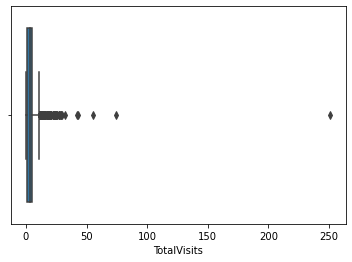

In [32]:
sns.boxplot(lead_data['TotalVisits'])
plt.show()

In [33]:
#Since there are outliers, imputing with the median values
median = float(lead_data['TotalVisits'].median())
lead_data['TotalVisits']=lead_data['TotalVisits'].mask(lead_data['TotalVisits']>6, median)

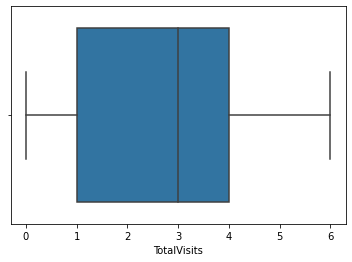

In [34]:
#Outliers have been capped
sns.boxplot(lead_data['TotalVisits'])
plt.show()

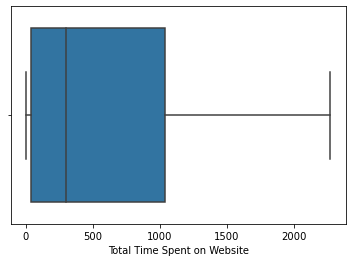

In [35]:
sns.boxplot(lead_data['Total Time Spent on Website'])
plt.show()

In [36]:
lead_data.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,I agree to pay the amount through cheque,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Step 7: Test-Train Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# Putting feature variable to X
X = lead_data.drop(['Converted','Lead Number'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,I agree to pay the amount through cheque,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [39]:
# Putting response variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [40]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 8: Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','TotalVisits']] = scaler.fit_transform(X_train[['Total Time Spent on Website','TotalVisits']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,I agree to pay the amount through cheque,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4230,0,0,-0.292990,0.673044,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7047,0,0,-0.292990,1.061308,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1871,0,0,-1.428481,-0.964722,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6012,0,0,-1.428481,-0.910012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6167,0,0,-1.428481,-0.964722,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [43]:
#checking the conversion rate
conv=(sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
conv

48.68360277136259

We have almost 49% conversion rate

### Step 9: Looking at Correlations

In [44]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

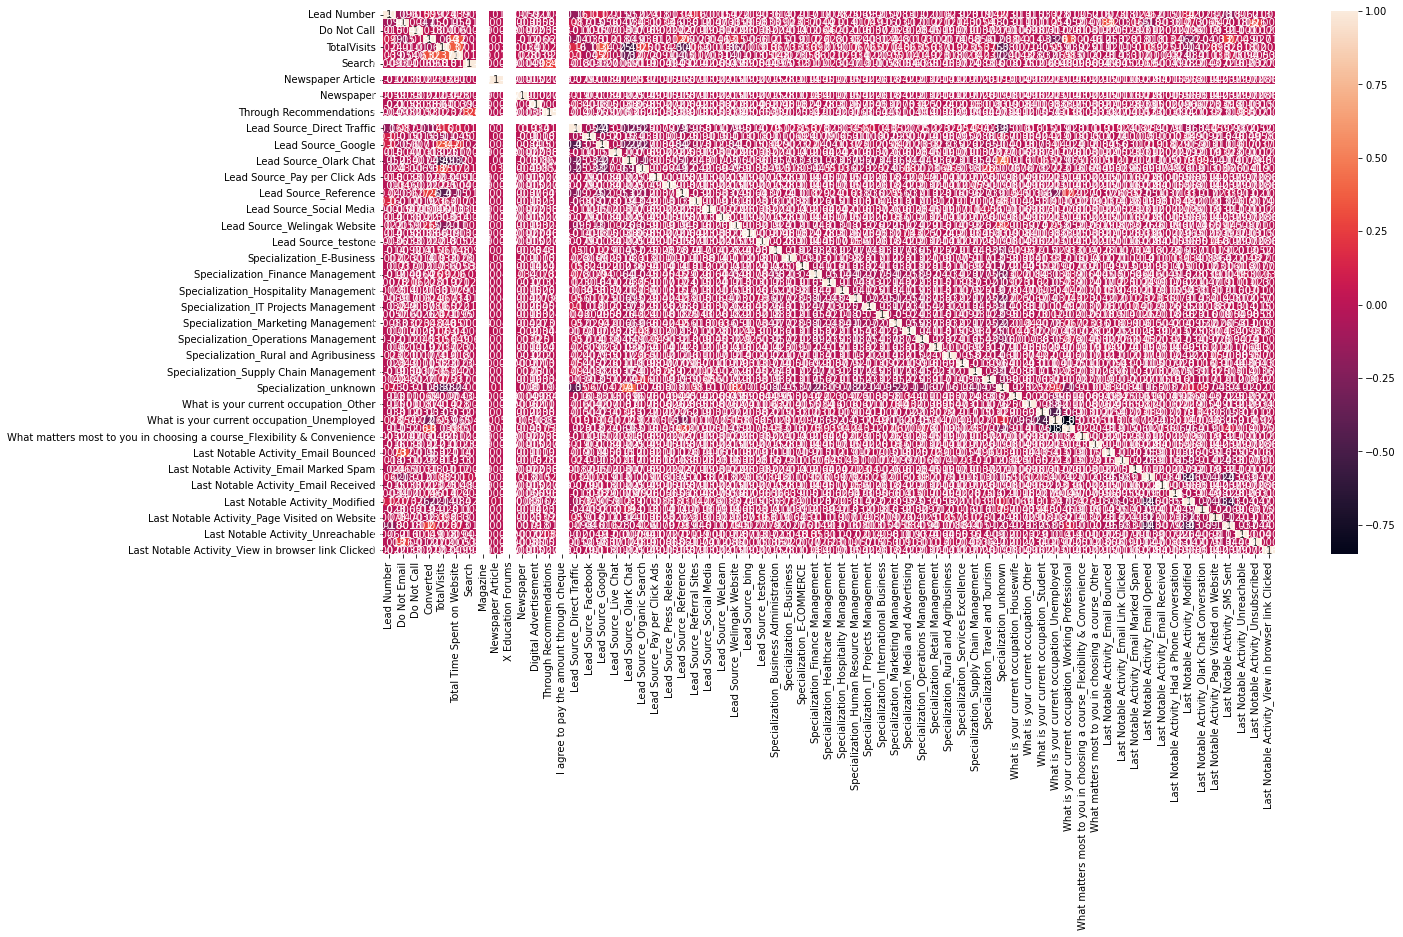

In [45]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(lead_data.corr(),annot = True)
plt.show()

### Step 10: Model Building

In [46]:
import statsmodels.api as sm

In [47]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4546
Model:                            GLM   Df Residuals:                     4486
Model Family:                Binomial   Df Model:                           59
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 09 May 2022   Deviance:                   1.1080e+05
Time:                        00:42:49   Pearson chi2:                 5.42e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    5.136e+15   5.52e+07   9.31e+07      0.000    5.14e+15    5.14e+15
Do Not Email                                                            -4.683e+14   4.47e+06  -1.05e+08      0.000   -4.68e+14   -4.68e+14
Do Not Call                                                              5.669e+14   6.76e+07   8.39e+06      0.000    5.67e+14    5.67e+14
TotalVisits                                                              5.599e+13    1.6e+06   3.49e+07      0.000     5.6e+13     5.6e+13
Total Time Spent on Website                                              2.893e+14   1.12e+06   2.58e+08      0.000    2.89e+14    2.89e+14
Search                                                                    2.59e+14   2.55e+07   1.01e+07      0.000    2.59e+14    2.59e+14
Magazine                                                                  -43.9725   6.21e-07  -7.08e+07      0.000     -43.973     -43.973
Newspaper Article                                                        1.508e+15   6.72e+07   2.24e+07      0.000    1.51e+15    1.51e+15
X Education Forums                                                        -43.5407    4.5e-07  -9.68e+07      0.000     -43.541     -43.541
Newspaper                                                               -4.544e+15   6.72e+07  -6.76e+07      0.000   -4.54e+15   -4.54e+15
Digital Advertisement                                                   -4.021e+15   4.76e+07  -8.45e+07      0.000   -4.02e+15   -4.02e+15
Through Recommendations                                                  1.209e+15   3.63e+07   3.33e+07      0.000    1.21e+15    1.21e+15
I agree to pay the amount through cheque                                  -43.3023   9.41e-07   -4.6e+07      0.000     -43.302     -43.302
Lead Source_Direct Traffic                                              -4.744e+15   4.77e+07  -9.95e+07      0.000   -4.74e+15   -4.74e+15
Lead Source_Facebook                                                     -3.94e+15   4.91e+07  -8.03e+07      0.000   -3.94e+15   -3.94e+15
Lead Source_Google                                                      -4.808e+15   4.77e+07  -1.01e+08      0.000   -4.81e+15   -4.81e+15
Lead Source_Live Chat                                                   -4.584e+14   6.74e+07  -6.81e+06      0.000   -4.58e+14   -4.58e+14
Lead Source_Olark Chat                                                   -4.61e+15   4.78e+07  -9.65e+07      0.000   -4.61e+15   -4.61e+15
Lead Source_Organic Search                                              -4.749e+15   4.77e+07  -9.95e+07      0.000   -4.75e+15   -4.75e+15
Lea

### Step 11: Feature Selection Using RFE

In [48]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [49]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [50]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False,  True,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True,  True, False, False, False, False,
       False, False, False,  True, False, False, False,  True,  True,
       False, False])

In [51]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 26),
 ('TotalVisits', False, 43),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 12),
 ('Magazine', False, 51),
 ('Newspaper Article', False, 9),
 ('X Education Forums', False, 50),
 ('Newspaper', False, 4),
 ('Digital Advertisement', False, 10),
 ('Through Recommendations', False, 39),
 ('I agree to pay the amount through cheque', False, 49),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 5),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 8),
 ('Lead Source_Olark Chat', False, 27),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 13),
 ('Lead Source_Press_Release', False, 47),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 18),
 ('Lead Source_WeLearn', False, 48),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 28),
 ('Lead Source_testone', Fal

In [52]:
col = X_train.columns[rfe.support_]

In [53]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

##### Assessing the model with StatsModels

In [54]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4546
Model:                            GLM   Df Residuals:                     4530
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2122.4
Date:                Mon, 09 May 2022   Deviance:                       4244.8
Time:                        00:42:59   Pearson chi2:                 4.91e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4141      0.716      1.974      0.048       0.010       2.818
Do Not Email                                            -1.4416      0.184     -7.815      0.000      -1.803      -1.080
Total Time Spent on Website                              1.1129      0.046     24.034      0.000       1.022       1.204
Lead Source_Direct Traffic                              -1.4902      0.125    -11.893      0.000      -1.736      -1.245
Lead Source_Google                                      -1.0299      0.121     -8.501      0.000      -1.267      -0.792
Lead Source_Organic Search                              -1.2093      0.143     -8.455      0.000      -1.490      -0.929
Lead Source_Reference                                    2.2319      0.211     10.578      0.000       1.818       2.645
Lead Source_Referral Sites                              -1.7002      0.411     -4.136      0.000      -2.506      -0.895
Lead Source_Welingak Website                             5.0448      1.015      4.968      0.000       3.055       7.035
What is your current occupation_Housewife               22.6755   2.49e+04      0.001      0.999   -4.87e+04    4.87e+04
What is your current occupation_Student                 -1.2037      0.742     -1.621      0.105      -2.659       0.251
What is your current occupation_Unemployed              -1.2063      0.714     -1.689      0.091      -2.606       0.194
What is your current occupation_Working Professional     1.2291      0.735      1.673      0.094      -0.211       2.669
Last Notable Activity_Had a Phone Conversation          24.0533   2.01e+04      0.001      0.999   -3.93e+04    3.93e+04
Last Notable Activity_SMS Sent                           1.3536      0.085     15.835      0.000       1.186       1.521
Last Notable Activity_Unreachable                        2.6936      0.813      3.313      0.001       1.100       4.287
========================================================================================================================
"""

In [55]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4230    0.722487
7047    0.588806
1871    0.296135
6012    0.806443
6167    0.996060
1290    0.991606
6757    0.619595
7643    0.033970
1880    0.659242
8513    0.138994
dtype: float64

In [56]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.72248719, 0.58880583, 0.29613548, 0.80644335, 0.99606008,
       0.99160619, 0.6195946 , 0.03396955, 0.65924201, 0.13899377])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [57]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,1,0.722487,4230
1,0,0.588806,7047
2,0,0.296135,1871
3,0,0.806443,6012
4,1,0.996060,6167


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [58]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final

,Converted,Converted_Prob,CustID,predicted
0,1,0.722487,4230,1
1,0,0.588806,7047,1
2,0,0.296135,1871,0
3,0,0.806443,6012,1
4,1,0.996060,6167,1
...,...,...,...,...
4541,0,0.296135,8588,0
4542,0,0.290688,96,0
4543,0,0.385528,5772,0
4544,0,0.125544,8497,0


In [59]:
from sklearn import metrics

In [60]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1906  402]
 [ 565 1673]]


In [61]:
# Predicted     not_converted    converted
# Actual
# not_converted        1906      402
# converted             565      1673

In [62]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7872855257369116


#### Checking VIFs

In [63]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,6.95
3,Lead Source_Google,3.63
2,Lead Source_Direct Traffic,3.26
4,Lead Source_Organic Search,2.12
11,What is your current occupation_Working Profes...,1.90
5,Lead Source_Reference,1.63
13,Last Notable Activity_SMS Sent,1.45
1,Total Time Spent on Website,1.24
7,Lead Source_Welingak Website,1.14
9,What is your current occupation_Student,1.14


In [65]:
col = col.drop('What is your current occupation_Unemployed', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [66]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4546
Model:                            GLM   Df Residuals:                     4531
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2124.0
Date:                Mon, 09 May 2022   Deviance:                       4248.0
Time:                        00:43:06   Pearson chi2:                 4.92e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2167      0.098      2.212      0.027       0.025       0.409
Do Not Email                                            -1.4357      0.184     -7.802      0.000      -1.796      -1.075
Total Time Spent on Website                              1.1162      0.046     24.118      0.000       1.026       1.207
Lead Source_Direct Traffic                              -1.4936      0.125    -11.926      0.000      -1.739      -1.248
Lead Source_Google                                      -1.0358      0.121     -8.555      0.000      -1.273      -0.799
Lead Source_Organic Search                              -1.2102      0.143     -8.465      0.000      -1.490      -0.930
Lead Source_Reference                                    2.2310      0.211     10.578      0.000       1.818       2.644
Lead Source_Referral Sites                              -1.7098      0.411     -4.158      0.000      -2.516      -0.904
Lead Source_Welingak Website                             5.0387      1.015      4.962      0.000       3.049       7.029
What is your current occupation_Housewife               23.8759   2.49e+04      0.001      0.999   -4.87e+04    4.87e+04
What is your current occupation_Student                 -0.0028      0.212     -0.013      0.989      -0.418       0.412
What is your current occupation_Working Professional     2.4312      0.180     13.494      0.000       2.078       2.784
Last Notable Activity_Had a Phone Conversation          24.0495      2e+04      0.001      0.999   -3.93e+04    3.93e+04
Last Notable Activity_SMS Sent                           1.3481      0.085     15.782      0.000       1.181       1.516
Last Notable Activity_Unreachable                        2.7010      0.811      3.329      0.001       1.111       4.291
========================================================================================================================
"""

In [67]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [68]:
y_train_pred[:10]

array([0.72470997, 0.59037268, 0.29730565, 0.80719888, 0.99603641,
       0.99164201, 0.61962041, 0.03427824, 0.65874694, 0.13944857])

In [69]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [70]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,1,0.724710,4230,1
1,0,0.590373,7047,1
2,0,0.297306,1871,0
3,0,0.807199,6012,1
4,1,0.996036,6167,1


In [71]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7872855257369116


##### Let's check the VIFs again

In [72]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_SMS Sent,1.39
2,Lead Source_Direct Traffic,1.21
3,Lead Source_Google,1.20
10,What is your current occupation_Working Profes...,1.20
5,Lead Source_Reference,1.18
4,Lead Source_Organic Search,1.11
1,Total Time Spent on Website,1.10
0,Do Not Email,1.09
7,Lead Source_Welingak Website,1.03
9,What is your current occupation_Student,1.02


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [73]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1907,  401],
       [ 566, 1672]])

In [74]:
# Predicted     not_converted    converted
# Actual
# not_converted        1907      401
# converted             566      1672

In [75]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7872855257369116

#### Metrics beyond simply accuracy

In [76]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [77]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7470956210902592

In [78]:
# Let us calculate specificity
TN / float(TN+FP)

0.8262564991334489

In [79]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.17374350086655113


In [80]:
# positive predictive value 
print (TP / float(TP+FP))

0.8065605402797877


In [81]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7711281843914274


### Step 12: Plotting the ROC Curve

In [82]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [83]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

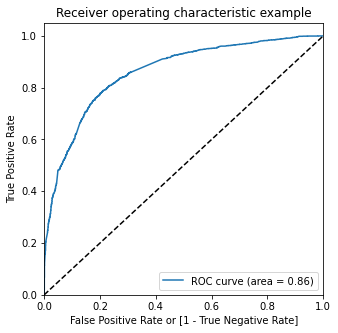

In [84]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Finding Optimal Cutoff Point

In [85]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.724710,4230,1,1,1,1,1,1,1,1,1,0,0
1,0,0.590373,7047,1,1,1,1,1,1,1,0,0,0,0
2,0,0.297306,1871,0,1,1,1,0,0,0,0,0,0,0
3,0,0.807199,6012,1,1,1,1,1,1,1,1,1,1,0
4,1,0.996036,6167,1,1,1,1,1,1,1,1,1,1,1


In [86]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.492301  1.000000  0.000000
0.1   0.1  0.547074  0.992404  0.115251
0.2   0.2  0.692917  0.943700  0.449740
0.3   0.3  0.773207  0.860143  0.688908
0.4   0.4  0.783986  0.809205  0.759532
0.5   0.5  0.787286  0.747096  0.826256
0.6   0.6  0.772987  0.677391  0.865685
0.7   0.7  0.739331  0.561662  0.911612
0.8   0.8  0.696876  0.429401  0.956239
0.9   0.9  0.642103  0.292225  0.981369


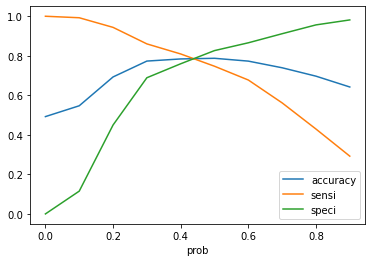

In [87]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [88]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.724710,4230,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.590373,7047,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.297306,1871,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.807199,6012,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.996036,6167,1,1,1,1,1,1,1,1,1,1,1,1


In [89]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7839859216893973

In [90]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1753,  555],
       [ 427, 1811]])

In [91]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [92]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8092046470062556

In [93]:
# Let us calculate specificity
TN / float(TN+FP)

0.7595320623916811

In [94]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2404679376083189


In [95]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7654268808114962


In [96]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8041284403669725


#### Precision and Recall

In [97]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1907,  401],
       [ 566, 1672]])

In [98]:
from sklearn.metrics import precision_score, recall_score

In [99]:
# precision_score
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8065605402797877

In [100]:
# Recall score
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7470956210902592

In [101]:
from sklearn.metrics import precision_recall_curve

In [102]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

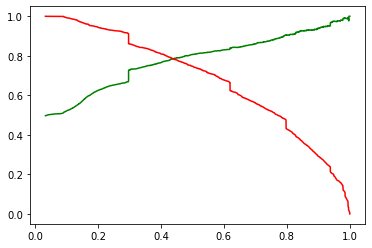

In [103]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 13: Making predictions on the test set

In [104]:
X_test[['Total Time Spent on Website','TotalVisits']] = scaler.transform(X_test[['Total Time Spent on Website','TotalVisits']])

In [105]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
7379,0,-0.278201,1,0,0,0,0,0,0,0,0,0,0,0
898,0,-0.675289,0,1,0,0,0,0,0,0,0,0,0,0
262,0,-0.964722,0,0,0,0,0,1,0,0,0,0,0,0
4076,0,1.643703,1,0,0,0,0,0,0,0,0,0,0,0
8101,0,-0.964722,0,0,0,1,0,0,0,0,1,0,1,0


In [106]:
X_test_sm = sm.add_constant(X_test)

#### Making predictions on the test set

In [107]:
y_test_pred = res.predict(X_test_sm)

In [108]:
y_test_pred[:10]

7379    0.169747
898     0.171801
262     0.984910
4076    0.635954
8101    0.994235
8960    0.144286
2745    0.095578
4688    0.432939
1494    0.297306
6050    0.196638
dtype: float64

In [109]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [110]:
# Let's see the head
y_pred_1.head()

,0
7379,0.169747
898,0.171801
262,0.984910
4076,0.635954
8101,0.994235


In [111]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [112]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [113]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [114]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [115]:
y_pred_final.head()

,Converted,CustID,0
0,0,7379,0.169747
1,0,898,0.171801
2,1,262,0.984910
3,0,4076,0.635954
4,1,8101,0.994235


In [116]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [117]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Converted','Converted_Prob'], axis=1)

In [118]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Converted,Converted_Prob
0,7379,0,0.169747
1,898,0,0.171801
2,262,1,0.984910
3,4076,0,0.635954
4,8101,1,0.994235


In [119]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [120]:
y_pred_final.head()

,CustID,Converted,Converted_Prob,final_predicted
0,7379,0,0.169747,0
1,898,0,0.171801,0
2,262,1,0.984910,1
3,4076,0,0.635954,1
4,8101,1,0.994235,1


In [121]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7983581323755772

In [122]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[816, 209],
       [184, 740]])

In [123]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [124]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8008658008658008

In [125]:
# Let us calculate specificity
TN / float(TN+FP)

0.7960975609756098